# 35 重複值與遺失值處理

In [88]:
import pandas as pd
import numpy as np

In [89]:
df_train=pd.read_csv("Titanic_train.csv")
print(df_train.info())
print()
print(df_train.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                     

In [90]:
#產生一個不重覆的資料集，透過 drop_duplicates 函數
nodup_df_train=df_train.drop_duplicates(subset=None, keep='first', inplace=False)

In [91]:
print(df_train.duplicated())
#計算重複的數目
print(df_train.duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool
0


In [92]:
#判斷每一個資料點，是否為空值:
print(df_train.isnull().head(5))
print()
# 判断哪些”列”存在缺失值
print(df_train.isnull().any())
print()
# 統計 data 裡有空值的變數個數
print(df_train.isnull().any().sum())

   PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False  

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

3


In [93]:
# 當有些資料用 "null" 代表空值時，需要先做轉換，
df_train= df_train.replace('null',np.NaN)
# 統計 data 裡每一列是否有空值
print(df_train.isnull().any())

# 統計 data 裡有空值的變數個數
print(df_train.isnull().any().sum())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
3


In [94]:
#可以只顯示存在缺失值的行列，清楚地確定缺失值的狀態
# 代表有缺時的地方才顯示df_train.isnull().values==True
df_train[df_train.isnull().values==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


29.69911764705882
14.526497332334042
23.79929292929293
17.596074065915875

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


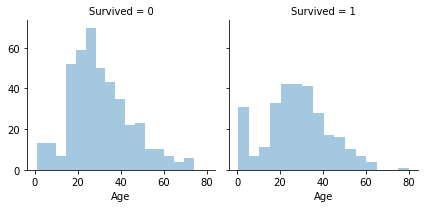

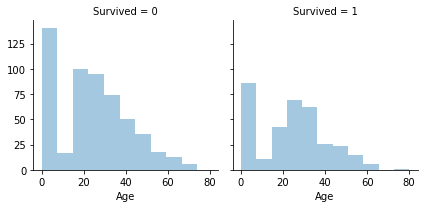

In [95]:
# 補值
import seaborn as sns
# 我們以  Age 為例，進行補植，補固定值
#補值前 平均值
print(df_train['Age'].mean()) #age平均
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

#補值後
df_train['Age']=df_train['Age'].fillna(0)
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
print()
print(df_train[df_train['Age'].isnull().values==True])
#補完就沒有遺失值了，但是看到這樣的補值效果，平均值上有很明顯的差異，
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

# 36 異常值偵測

In [96]:
df_train = pd.read_csv("Titanic_train.csv")

32.204207968574636
49.6934285971809


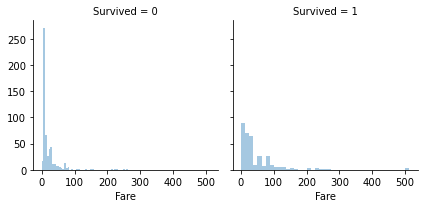

In [97]:
print(df_train['Fare'].mean()) #Fare平均
print(df_train['Fare'].std()) #Fare標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

In [98]:
# 方法 1: 看統計量
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
# 方法 2
# 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。
import numpy as np

# 創建一個函數，計算在這個資料中， ys:資料，times : 幾倍標準差，找出在這樣條件下的異常值。
def outliers_z_score(ys,times):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > times)

out_index=outliers_z_score(df_train['Fare'],3)
print(out_index[0])
print("用第二種方法的找出的 outlier 有哪些?")
print(df_train.loc[out_index[0],'Fare'])
#  所以用這個方法，找出的疑似 outlier 就是高票價的族群。

[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]
用第二種方法的找出的 outlier 有哪些?
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


In [121]:
# 方法3: 異常值的判別方法3-盒鬚圖判別法(IQR method)
import numpy as np
import matplotlib.pyplot as plt
# 透過一個函數來判斷是否為異常值
def outliers_iqr(ys,times):
    #注意 使用 np.percentile 要去除 nan 要不然計算出來會錯誤，所以我們採用下者的程式 np.nanpercentile
    #quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * times)
    upper_bound = quartile_3 + (iqr * times)
    return np.where((ys > upper_bound) | (ys < lower_bound))
out_index2=outliers_iqr(df_train['Fare'],1.5)
print(out_index2)
print("用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)")
print(df_train.loc[out_index2[0],'Fare'])
print()


(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
       139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
       258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
       311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
       375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
       496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
       585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
       689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
       779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879]),)
用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64



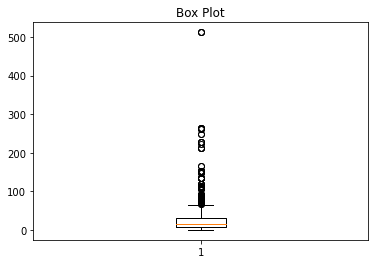

In [101]:
# 使用np.isnana(data)，找出在 Fare中的遺失值，然後逐位反轉，讓遺失值為 0,則可以透過索引的方式，濾掉遺失值。
import matplotlib.pyplot as plt
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])],whis=1.5)    #作圖
plt.title('Box Plot')
plt.show()

# 37: 用KNN補值

In [102]:
import pandas as pd
df_train = pd.read_csv("Titanic_train.csv")
#計算每一行是否有遺失值，計算遺失比例
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
missing_index=data.isnull()

#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態轉型 
#透過 preprocessing 轉換


from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
df_train['Pclass']=le.fit_transform(df_train['Pclass'])
df_train['Sex']=le.fit_transform(df_train['Sex'])

data=df_train[['Sex','Age','Pclass']]

# KNN
#設定用多少鄰居資訊來補值
value_neighbors=1
from sklearn.impute import KNNImputer
#進行 KNN的一些設定
imputer = KNNImputer(n_neighbors=value_neighbors)
#把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(data))




#只呈現有遺失值的資料
print(data[missing_index.values==True])
#只呈現有遺失值的資料-呈現補值的結果
print(df_filled[missing_index.values==True])

     Sex  Age  Pclass
5      1  NaN       2
17     1  NaN       1
19     0  NaN       2
26     1  NaN       2
28     0  NaN       2
..   ...  ...     ...
859    1  NaN       2
863    0  NaN       2
868    1  NaN       2
878    1  NaN       2
888    0  NaN       2

[177 rows x 3 columns]
       0     1    2
5    1.0  22.0  2.0
17   1.0  35.0  1.0
19   0.0  26.0  2.0
26   1.0  22.0  2.0
28   0.0  26.0  2.0
..   ...   ...  ...
859  1.0  22.0  2.0
863  0.0  26.0  2.0
868  1.0  22.0  2.0
878  1.0  22.0  2.0
888  0.0  26.0  2.0

[177 rows x 3 columns]


# 38 變數相關性

In [103]:
import numpy as np
import pandas as pd

In [104]:
df_train = pd.read_csv("Titanic_train.csv")

In [105]:
df_train['Survived_cate']=df_train['Survived']
df_train['Survived_cate']=df_train['Survived_cate'].astype('object')

In [106]:
#Q1: 透過數值法計算 Age 和 Survived 是否有相關性?
#Age:連續型 Survived_cate 為離散型，所以採用 Eta Squared
#計算相關係數，不能允許有遺失值，所以必須先補值，或者把遺失值刪除
## 取出資料後，把遺失值刪除
import pingouin as pg
complete_data=df_train[['Age','Survived_cate']].dropna()
aov = pg.anova(dv='Age', between='Survived_cate', data=complete_data, detailed=True)
print(aov)
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
print(etaSq)

          Source             SS   DF          MS         F     p-unc       np2
0  Survived_cate     897.187582    1  897.187582  4.271195  0.039125  0.005963
1         Within  149559.448362  712  210.055405       NaN       NaN       NaN
0.0059630974469252


In [107]:
#Q2:透過數值法計算 Sex 和 Survived 是否有相關性?
## Sex:離散型 Survived_cate 為離散型，所以採用 Cramér's V
import researchpy
contTable = pd.crosstab(df_train['Sex'], df_train['Survived_cate'])
crosstab, res = researchpy.crosstab(df_train['Survived_cate'], df_train['Sex'], test='chi-square')
#print(res)
print("Cramer's value is",res.loc[2,'results'])

Cramer's value is 0.5434


In [108]:
#Q3: 透過數值法計算 Age 和 Fare 是否有相關性?
## Age 連續 , Fare 連續，用 Pearson 相關係數
## 取出資料後，把遺失值刪除
from scipy import stats
complete_data=df_train[['Age','Fare']].dropna()
display(complete_data)
# 由於 pearsonr 有兩個回傳結果，我們只需取第一個回傳值為相關係數
corr, p_value=stats.pearsonr(complete_data['Age'],complete_data['Fare'])
print(corr)
print(p_value)
#代表身高和體重有高度線性相關

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


0.0960666917690389
0.010216277504442105


# 40 特徵挑選

In [109]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn

In [110]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [111]:
#1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
#2.把題目中的 Survived 用 Survived_cate 來做分析    
df_train['Survived_cate']=df_train['Survived']
df_train['Survived_cate']=df_train['Survived_cate'].astype('object')
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Survived_cate  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


In [112]:
#我們先把遺失值刪除
## 取出資料後，把遺失值刪除
complete_data=df_train.dropna()

#排除 Ｎame 當特徵，先刪除每一個人都是獨特的資料，先檢視其他變數
complete_data=complete_data.drop(['Name','Ticket','PassengerId'], axis=1)
print(complete_data.shape)

num_features = []
for dtype, feature in zip(complete_data.dtypes, complete_data.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

cat_features = []
for dtype, feature in zip(complete_data.dtypes, complete_data.columns):
    if dtype == 'object':
        cat_features.append(feature)
print(f'{len(cat_features)} category Features : {cat_features}\n')

(183, 10)
6 Numeric Features : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

4 category Features : ['Sex', 'Cabin', 'Embarked', 'Survived_cate']



In [113]:
x=complete_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex', 'Embarked']]
y=complete_data['Survived']

In [114]:
#目標變數為 Survived，試著用包裝法，搭配SVC，排出其餘特徵的重要性!
#離散要轉換成數值，['Sex',  'Cabin', 'Embarked']
#Can only use .cat accessor with a 'category' dtype
# .cat.codes ：分類的編碼，用數字表示分類數據
x = x.copy()
# c = x.loc[:,'Sex'].astype('category')
# d = dict(enumerate(c.cat.categories))
# print (d)
x.loc[:,'Sex']=x.loc[:,'Sex'].astype('category').cat.codes # ok
# print('----')
# print(x.loc[:,'Sex'])
# print('----')
# display(x.head(5))
# c = x.loc[:,'Embarked'].astype('category')
# d = dict(enumerate(c.cat.categories))
# print('----')
# print ("d=",d)
x.loc[:,'Embarked']=x.loc[:,'Embarked'].astype('category').cat.codes # ok

In [115]:
#執行 包裝法
from sklearn.svm import SVC
#遞歸特徵消除(RFE)
from sklearn.feature_selection import RFE
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(x, y)
## True= selected feature
print(selector.support_)
#Selected (i.e., estimated best) features are assigned rank 1.
ranking=selector.ranking_
print(ranking)
rfe_feature = x.loc[:,selector.support_].columns.tolist()
print(rfe_feature)

[False False False False False  True False]
[3 5 2 6 7 1 4]
['Sex']
